# Introduction

How many times have you been watching Premier League football and heard the commentator says something along the lines of "And the birthday boy tucks it into the bottom corner," or "That's one heck of a birthday present - a goal!" Maybe I  just watch too much football, but I feel like I've heard those phrases a lot. So, I decided to put my theory to the test using a [t-test](https://mse.redwoods.edu/darnold/math15/spring2013/R/Activities/PooledTTest.html). 

Hopefully you're familiar with a t-test by now, so let's get started. We have the following hypotheses:

$$H_0: \text{Birthday does not affect player performance}$$
$$H_a: \text{Birthday positively affects player performance}$$

Or equivalently,

$$H_0: \text{Average FPL score by birthday boys = Average FPL score by those same birthday boys in every other game}$$
$$H_a: \text{Average FPL score by birthday boys > Average FPL score by those same birthday boys in every other game}$$

We have a signficance level of $\alpha = 0.05$

Suppose we get some value $k$ for the difference of the sample means. The $p$-value is the probability of observing data atleast as extreme as we did in the direction of the alternative, given that the null is true. In this case, it would be the probability that the difference of the means is greater than or equal to $k$. Mathematically, that translates to

$\begin{align*}
p-\text{value} &= P(\overline B - \overline{NB} \ge k \vert \mu_B = \mu_{NB}) \\
 &= P((\overline B - \overline{NB}) - (\mu_B - \mu_{NB}) \ge k - (\mu_B - \mu_{NB}) \vert \mu_B = \mu_{NB}) \\
 &= P((\overline B - \overline{NB}) - (\mu_B - \mu_{NB}) \ge k - 0) \\
 &= P\bigg(\frac{(\overline B - \overline{NB}) - (\mu_B - \mu_{NB})}{\sigma} \ge \frac{k}{\sigma}\bigg) \\
 &= P\bigg(t \ge \frac{k}{\sigma}\bigg) \\
 &= 1 - P\bigg(t \le \frac{k}{\sigma}\bigg) \\
 &= 1 - CDF_t\bigg(\frac{k}{\sigma}\bigg)
\end{align*}$

I decided to only include a player's stats for a game if they played atleast 60 minutes for that game. I used [FPL Data](https://github.com/vaastav/Fantasy-Premier-League/) to get information about minutes played and goals scored, and [scraped](https://gitlab.com/RohanJaisimha/football-data/-/blob/master/Birthday_Theory/Birthday_Grabber.ipynb) the birthday data from Google

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
import collections
import matplotlib as mlp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reading the data
data = pd.DataFrame([])
seasons = ["2016-17", "2017-18", "2018-19"]

for season in seasons:
    season_data = pd.read_csv("../Data/FPL_Data/" + season + "/Season_Data.csv")
    data = pd.concat([data, season_data])

data.head()

Name    Birthday  Game_1_Minutes_Played  Game_1_Points  \
0      Kyle Walker  1990-05-28                     90              6   
1  Stewart Downing  1984-07-22                     90              1   
2   Simon Mignolet  1988-03-06                     90              7   
3  Michael Carrick  1981-07-28                      0              0   
4  Per Mertesacker  1984-09-29                      0              0   

  Game_1_Date  Game_1_BPS  Game_1_Goals  Game_1_Assists  \
0  2016-08-13          25             0               1   
1  2016-08-13          11             0               0   
2  2016-08-14          29             0               0   
3  2016-08-14           0             0               0   
4  2016-08-14           0             0               0   

   Game_2_Minutes_Played  Game_2_Points  ... Game_37_Date  Game_37_BPS  \
0                     90              7  ...   2017-05-18            0   
1                     90              2  ...   2017-05-13            4   
2                     90              1  ...   2017-05-14           29   
3                      0              0  ...   2017-05-17            4   
4                      0              0  ...   2017-05-16            0   

   Game_37_Goals  Game_37_Assists  Game_38_Minutes_Played  Game_38_Points  \
0              0                0                       0               0   
1              0                0                      90               2   
2              0                0                      90               7   
3              0                0                      46               0   
4              0                0                      38               1   

  Game_38_Date  Game_38_BPS  Game_38_Goals  Game_38_Assists  
0   2017-05-21            0              0                0  
1   2017-05-21           15              0                0  
2   2017-05-21           29              0                0  
3   2017-05-21           13              0                0  
4   2017-05-21            5              0                0  

[5 rows x 230 columns]

In [3]:
# get the indices of players who played on their birthdays
players_who_played_on_their_birthdays = []

for i in range(len(data)):
    row = data.iloc[i]
    birthday = row["Birthday"]
    for gw in range(1, 39):
        gw_date = row["Game_" + str(gw) + "_Date"]
        minutes_played = row["Game_" + str(gw) + "_Minutes_Played"]
        if type(gw_date) is not str:
            break
        if minutes_played < 60:
            continue
        if birthday[5:] == gw_date[5:]:
            players_who_played_on_their_birthdays.append(i)

In [4]:
# get rid of all the players who didn't play on their birthday and reindex the data

data = data.iloc[players_who_played_on_their_birthdays]
data.index = range(len(data))

print(
    "The following",
    len(data),
    "players all played atleast 60 minutes on their birthdays:\n",
)
print("\n".join(data["Name"]))
print(
    "\n\nShoutout to Jeff Hendrick and Hugo Lloris for playing twice on their birthdays over the three seasons"
)

The following 64 players all played atleast 60 minutes on their birthdays:

Jeff Hendrick
Mesut Ozil
Chris Brunt
Francis Coquelin
Lucas Perez
Yohan Cabaye
Stephen Ward
Joel Ward
Christian Benteke
Juan Zuniga
Andrew Robertson
Gnegneri Yaya Toure
Ander Herrera
Charlie Adam
Abdoulaye Doucoure
Laurent Koscielny
Henrikh Mkhitaryan
Nathaniel Clyne
Edimilson Fernandes
George Boyd
Victor Valdes
Andy King
Craig Dawson
Tom Heaton
Ramiro Funes Mori
Adam Smith
Bruno Saltor Grau
Victor Moses
Jeff Hendrick
Ryan Fraser
Jeffrey Schlupp
Timothy Fosu-Mensah
Luka Milivojevic
Mame Biram Diouf
Matt Ritchie
Tom Cleverley
Ashley Barnes
Shane Duffy
Hugo Lloris
Anthony Knockaert
Wilfred Ndidi
Javier Manquillo
Nick Pope
Lewis Cook
Marc Albrighton
Georginio Wijnaldum
Harry Winks
Kyle Walker-Peters
Gabriel Fernando de Jesus
Toby Alderweireld
Calum Chambers
Anthony Martial
Dan Gosling
Raheem Sterling
Juan Mata
Hugo Lloris
Bobby Reid
Antonio Rudiger
Ricardo Domingos Barbosa Pereira
Martin Kelly
Mario Lemina
David L

In [5]:
data.head()

Name    Birthday  Game_1_Minutes_Played  Game_1_Points  \
0     Jeff Hendrick  1992-01-31                     16              1   
1        Mesut Ozil  1988-10-15                      0              0   
2       Chris Brunt  1984-12-14                      0              0   
3  Francis Coquelin  1991-05-13                     90              1   
4       Lucas Perez  1988-09-10                     61              2   

  Game_1_Date  Game_1_BPS  Game_1_Goals  Game_1_Assists  \
0  2016-09-10           3             0               0   
1  2016-08-14           0             0               0   
2  2016-08-13           0             0               0   
3  2016-08-14           3             0               0   
4  2016-09-10           7             0               0   

   Game_2_Minutes_Played  Game_2_Points  ... Game_37_Date  Game_37_BPS  \
0                     90              2  ...          NaN            0   
1                     18              1  ...   2017-05-16           41   
2                      0              0  ...   2017-05-16            9   
3                     90              2  ...   2017-05-16            0   
4                      3              1  ...          NaN            0   

   Game_37_Goals  Game_37_Assists  Game_38_Minutes_Played  Game_38_Points  \
0              0                0                       0               0   
1              0                1                      90               5   
2              0                0                      90               1   
3              0                0                      29               1   
4              0                0                       0               0   

  Game_38_Date  Game_38_BPS  Game_38_Goals  Game_38_Assists  
0          NaN            0              0                0  
1   2017-05-21           22              0                1  
2   2017-05-21           10              0                0  
3   2017-05-21            8              0                0  
4          NaN            0              0                0  

[5 rows x 230 columns]

In [6]:
# separating the player data into two bins, birthday_scores and non_birthday_scores
birthday_scores = np.array([])
non_birthday_scores = np.array([])

for i in range(len(data)):
    birthday = data.iloc[i]["Birthday"]
    for gw in range(1, 39):
        gw_date = data.iloc[i]["Game_" + str(gw) + "_Date"]
        minutes_played = data.iloc[i]["Game_" + str(gw) + "_Minutes_Played"]
        if type(gw_date) is not str:
            break
        if minutes_played < 60:
            continue
        if birthday[5:] == gw_date[5:]:
            birthday_scores = np.append(
                birthday_scores, data.iloc[i]["Game_" + str(gw) + "_Goals"]
            )
        else:
            non_birthday_scores = np.append(
                non_birthday_scores, data.iloc[i]["Game_" + str(gw) + "_Goals"]
            )

# Visualizing the Data

Birthday: Counter({0.0: 54, 1.0: 8, 2.0: 2})
Non-Birthday: Counter({0.0: 1366, 1.0: 114, 2.0: 12, 3.0: 1})


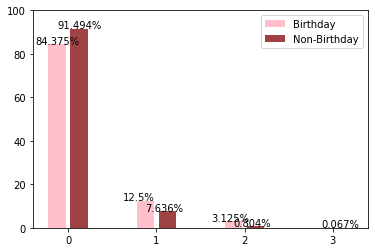

In [39]:
"""fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot([birthday_scores, non_birthday_scores], patch_artist = True)

for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
    
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['Birthday Scores', 'Non-Birthday Scores'])
plt.show()"""


fig, ax = plt.subplots()

birthday_scores_freq = collections.Counter(birthday_scores)
non_birthday_scores_freq = collections.Counter(non_birthday_scores)

birthday_scores_keys = np.array([*birthday_scores_freq.keys()])
birthday_scores_values = np.array([*birthday_scores_freq.values()])
non_birthday_scores_keys = np.array([*non_birthday_scores_freq.keys()])
non_birthday_scores_values = np.array([*non_birthday_scores_freq.values()])

birthday_scores_values = np.round_(
    np.array([*birthday_scores_freq.values()]) / sum(birthday_scores_values) * 100, 3
)
non_birthday_scores_values = np.round_(
    np.array([*non_birthday_scores_freq.values()])
    / sum(non_birthday_scores_values)
    * 100,
    3,
)

print("Birthday:", birthday_scores_freq)
print("Non-Birthday:", non_birthday_scores_freq)

ax.bar(
    birthday_scores_keys - 0.125,
    birthday_scores_values,
    width=0.2,
    color="#ffc0cb",
    label="Birthday",
)
ax.bar(
    non_birthday_scores_keys + 0.125,
    non_birthday_scores_values,
    width=0.2,
    color="#9e4244",
    label="Non-Birthday",
)

for i in range(len(birthday_scores_keys)):
    ax.text(
        (birthday_scores_keys - 0.125)[i] - 0.25,
        birthday_scores_values[i] + 1.5,
        s=str(birthday_scores_values[i]) + "%",
        verticalalignment="center",
    )

for i in range(len(non_birthday_scores_keys)):
    ax.text(
        (non_birthday_scores_keys + 0.125)[i] - 0.25,
        non_birthday_scores_values[i] + 1.5,
        s=str(non_birthday_scores_values[i]) + "%",
        verticalalignment="center",
    )

ax.set_xticks(range(4))
ax.set_yticks(range(0, 101, 20))
ax.legend()

plt.show()

# Running the Test

In [8]:
# performs the t-test with pooling
# params: two datasets data_1 and data_2
# returns: the corresponding p-value for testing the hypothesis that mean(data_1) > mean(data_2)
def t_test_pooling(data_1, data_2):
    mean_1 = np.mean(data_1)
    mean_2 = np.mean(data_2)

    n_1 = data_1.shape[0]
    n_2 = data_2.shape[0]

    var_1 = np.var(data_1)
    var_2 = np.var(data_2)
    pooled_std_dev = (
        (((n_1 - 1) * var_1 + (n_2 - 1) * var_2) / (n_1 + n_2 - 2))
        * (1 / n_1 + 1 / n_2)
    ) ** 0.5

    test_statistic = (mean_1 - mean_2) / pooled_std_dev
    df = n_1 + n_2 - 2

    return 1 - t.cdf(test_statistic, df=df)


print("p-value =", t_test_pooling(birthday_scores, non_birthday_scores))

p-value = 0.014060540142774247


# Conclusion

Since the p-value is less than our significance level (0.05), we can reject the null. Thus, we conclude that playing on one's birthday positively affects that player's performance